In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('heart-dataset.xlsx')
df = data.copy()

In [3]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            918 non-null    int64  
 1   sexe                           918 non-null    object 
 2   type_douleur_thoracique        918 non-null    object 
 3   pression_artérielle            918 non-null    int64  
 4   cholesterol                    918 non-null    int64  
 5   glycémie_a_jeun                918 non-null    int64  
 6   résultats_electrocardiogramme  918 non-null    object 
 7   fréquence_cardiaque_maximale   918 non-null    int64  
 8   angine                         918 non-null    object 
 9   depression                     918 non-null    float64
 10  pente_du_segment_ST_exercice   918 non-null    object 
 11  presence_maladie_cardiaque     918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 8

In [6]:
# les modalités des variables
for col in df:
    val_unique = np.unique(df[col])
    nbre_valeur = len(val_unique)
    if nbre_valeur < 10:
        print(f"Nombre de valeur de {col} :{nbre_valeur} -- {val_unique}")
    else:
        print(f"Nombre de valeur de {col} :{nbre_valeur}")

Nombre de valeur de age :50
Nombre de valeur de sexe :2 -- ['femme' 'homme']
Nombre de valeur de type_douleur_thoracique :4 -- ['AA' 'ASY' 'AT' 'DNA']
Nombre de valeur de pression_artérielle :67
Nombre de valeur de cholesterol :222
Nombre de valeur de glycémie_a_jeun :2 -- [0 1]
Nombre de valeur de résultats_electrocardiogramme :3 -- ['LVH' 'Normal' 'ST']
Nombre de valeur de fréquence_cardiaque_maximale :119
Nombre de valeur de angine :2 -- ['Non' 'Oui']
Nombre de valeur de depression :53
Nombre de valeur de pente_du_segment_ST_exercice :3 -- ['Ascendant' 'Descendant' 'Plat']
Nombre de valeur de presence_maladie_cardiaque :2 -- [0 1]


In [23]:
df_sexe = df.groupby("sexe").size()
df_sexe

sexe
femme    193
homme    725
dtype: int64

In [7]:
df_target = df.groupby("presence_maladie_cardiaque").size()
df_target

presence_maladie_cardiaque
0    410
1    508
dtype: int64

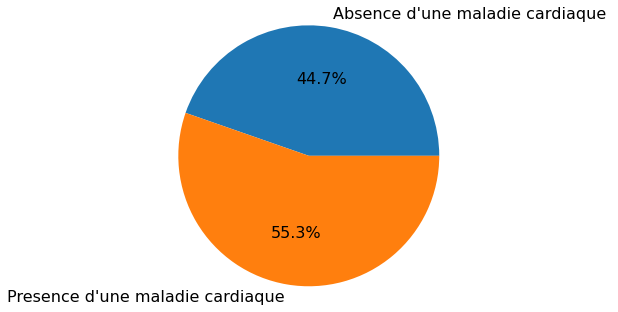

In [8]:
plt.pie(df_target.values, labels = ["Absence d'une maladie cardiaque ", "Presence d'une maladie cardiaque"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [9]:
df_sex = df.groupby(["sexe","presence_maladie_cardiaque"]).size()
df_sex

sexe   presence_maladie_cardiaque
femme  0                             143
       1                              50
homme  0                             267
       1                             458
dtype: int64

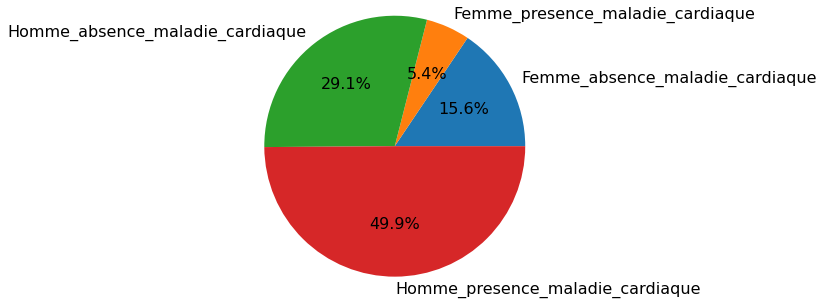

In [10]:
plt.pie(df_sex.values, labels = ["Femme_absence_maladie_cardiaque", "Femme_presence_maladie_cardiaque", "Homme_absence_maladie_cardiaque", "Homme_presence_maladie_cardiaque"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

In [11]:
def classe_age(x):
    if x < 25:
        tranche_age = "< 25"
    elif  25 <= x < 30:
        tranche_age = "25-30"
    elif 30 <= x < 35:
        tranche_age = "30-35"
    elif 35 <= x < 40:
        tranche_age = "35-40"
    elif 40 <= x < 45:
        tranche_age = "40-45"
    elif 45 <= x < 50:
        tranche_age = "45-50"
    elif 50 <= x < 55:
        tranche_age = "50-55"
    elif 55 <= x < 60:
        tranche_age = "55-60"
    elif 60 <= x < 65:
        tranche_age = "60-65"
    else:
        tranche_age = " > 65"
    return tranche_age

In [12]:
df.insert(df.columns.get_loc('age')+1, 'tranche_age', df['age'].map(classe_age))

In [13]:
df.head()

,age,tranche_age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,40-45,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,45-50,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,35-40,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,45-50,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,50-55,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


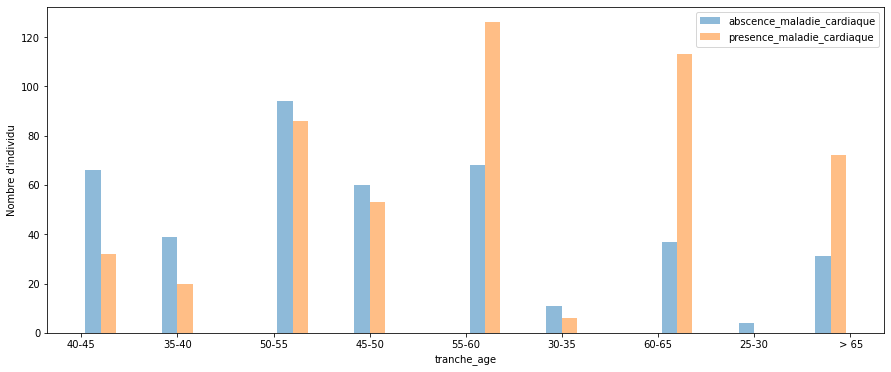

In [14]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].tranche_age, df[df.presence_maladie_cardiaque==1].tranche_age], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("tranche_age")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

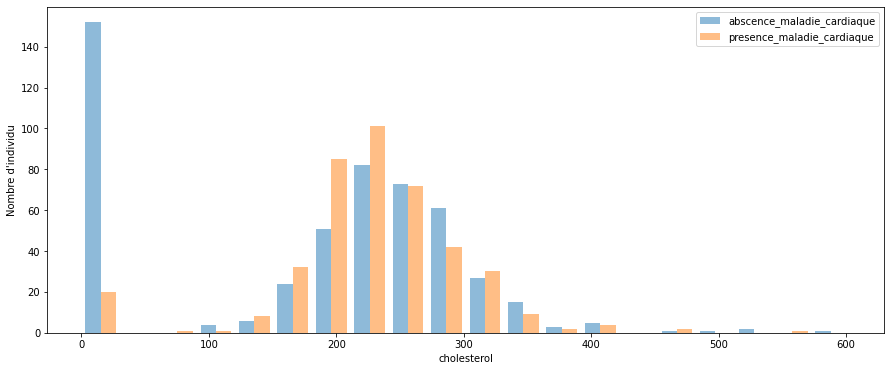

In [15]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==1].cholesterol, df[df.presence_maladie_cardiaque==0].cholesterol], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("cholesterol")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

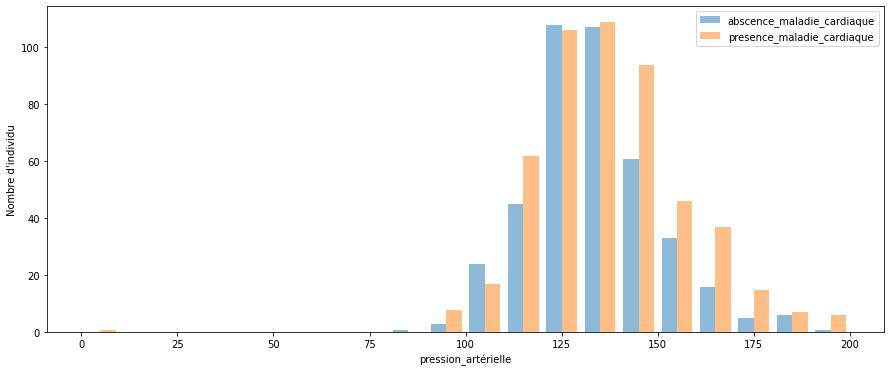

In [16]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].pression_artérielle, df[df.presence_maladie_cardiaque==1].pression_artérielle], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("pression_artérielle")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

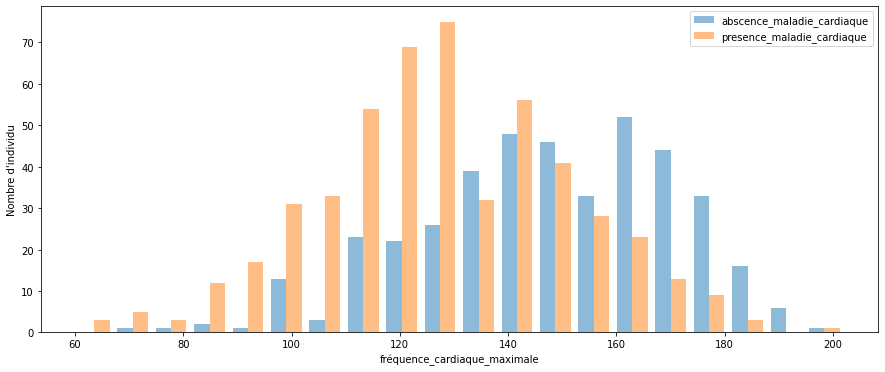

In [17]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].fréquence_cardiaque_maximale, df[df.presence_maladie_cardiaque==1].fréquence_cardiaque_maximale], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("fréquence_cardiaque_maximale")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

Découvrons s'il existe des **valeurs aberrantes** à l'intérieur de l'ensemble de données. Pour cela utilisons les Boxplot

In [18]:
df_1 = df[["age", "pression_artérielle", "cholesterol", "fréquence_cardiaque_maximale","depression"]]

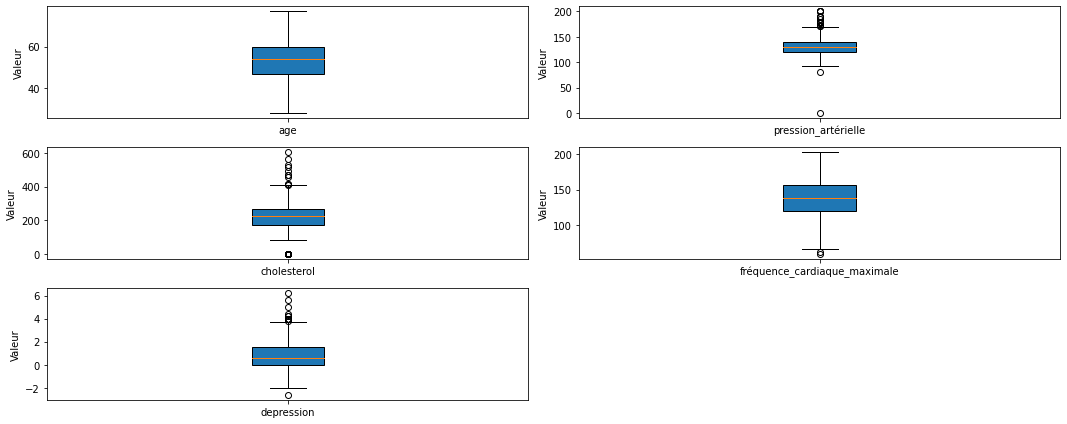

In [19]:
plt.figure(figsize=(15, 6))
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("Valeur")
plt.tight_layout()
plt.show()

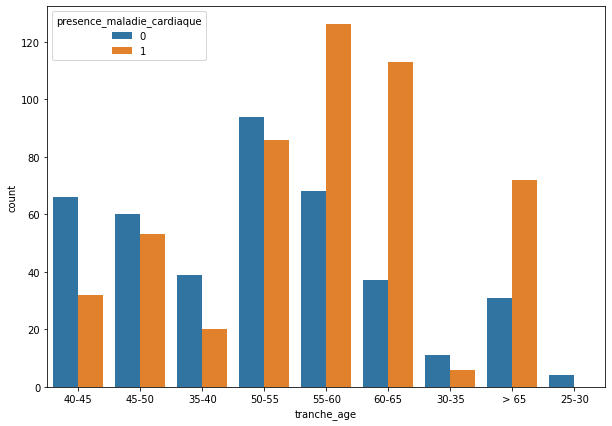

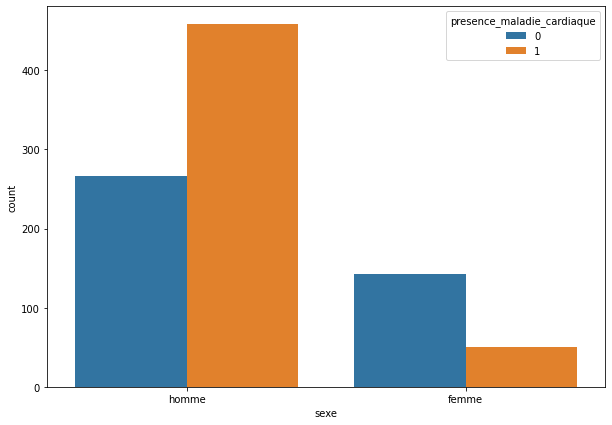

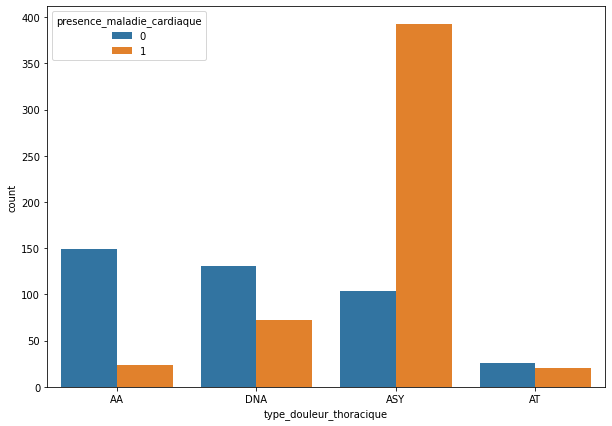

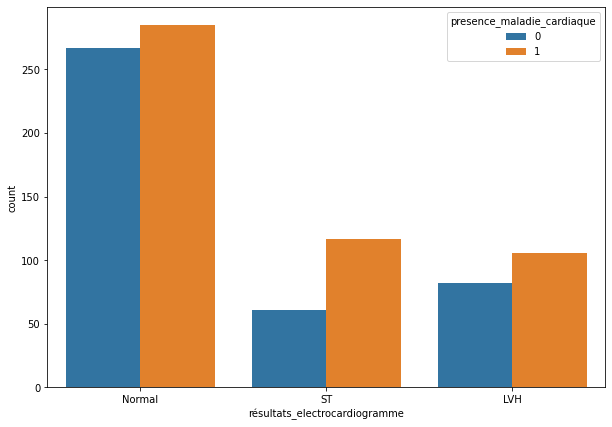

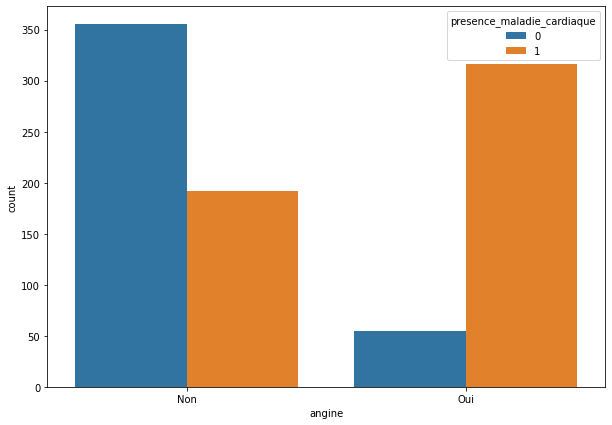

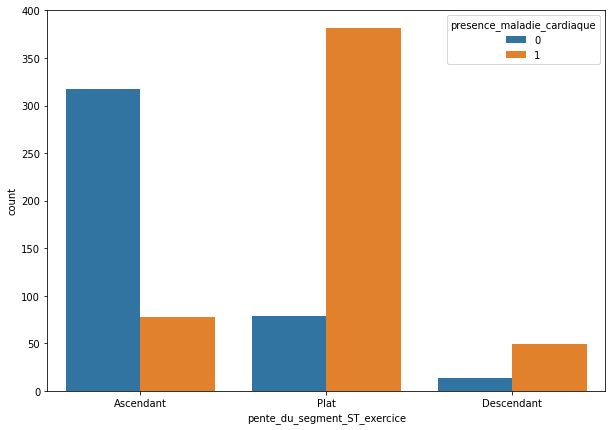

In [20]:
for col in df.select_dtypes(object):
    if col not in 'presence_maladie_cardiaque':
        plt.figure(figsize=(10, 7))
        sns.countplot(x=col, hue='presence_maladie_cardiaque', data=df);

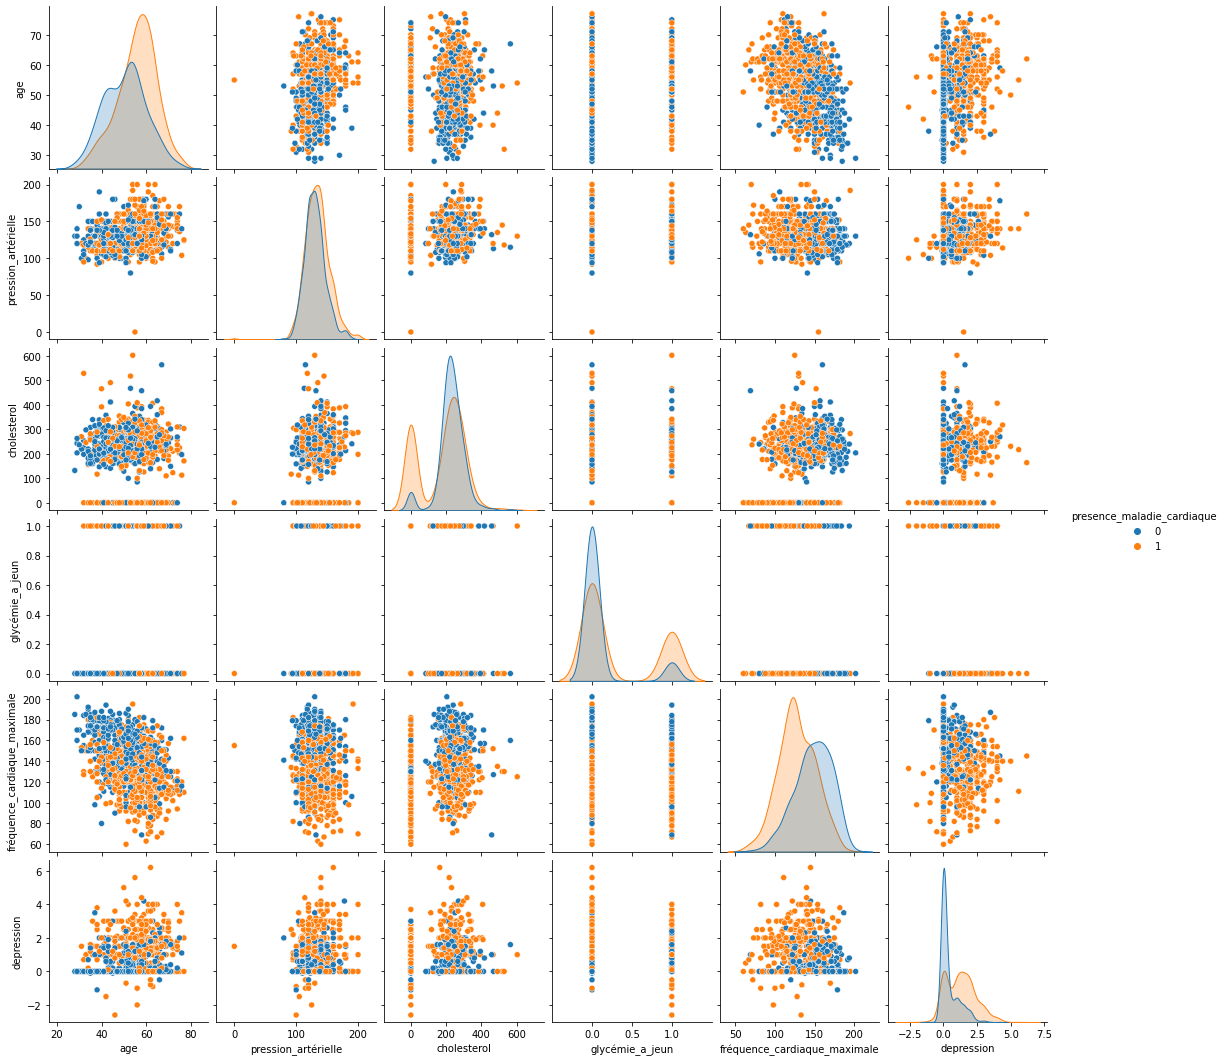

In [21]:
sns.pairplot(df, hue='presence_maladie_cardiaque');

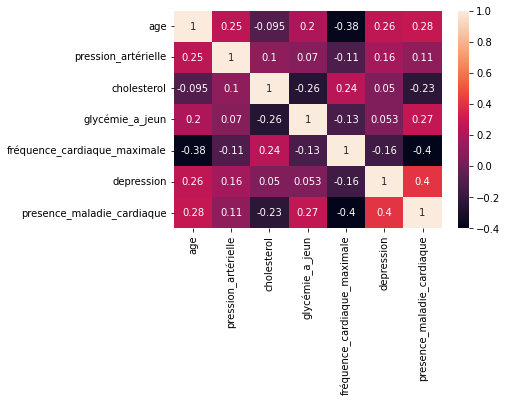

In [22]:
sns.heatmap(df.corr(), annot=True);

# Mission: Analyse Exploratoire du dataset Heart
## Problème: Prédire la présence d'une maladie cardiaque ou non

**Analyse de la forme** 
- Le dataset contient 918 individus (lignes) et 12 variables (colonnes)
- De plus nous avons 5 variables **quantitatives** (age, pression_artérielle, cholesterol, fréquence_cardiaque_maximale, depression
- Et 7 variables **qualitatives** dont la variable cible (sexe, type_douleur_thoracique, glycémie_a_jeun,résultats_electrocardiogramme, angine, pente_du_segment_ST_exercice, presence_maladie_cardiaque)
- Certaines variables ont **été recodé** (notamment: presence_maladie_cardiaque)
- Il n'y a pas de valeurs manquantes dans notre dataset
- Il y a des valeurs aberrantes dans chaque variables, sauf **l'âge**.

**Analyse de Fond**
- Nous constatons qu'il y a **55.3%** d'individu qui présente une maladie cardiaque contre **44.7%** d'individu qui n'en présente pas
- la maladie cardiaque touche plus les Hommes **49.9%** environ *50%* que les femmes avec **5.4%**
- A partir des ages, nous construisons des classes d'ages pour mieux classifier les individus et cibler la classe la plus touchée par la maladie
- Les individus **les plus touchés** par la maladie cardiaque ont leur age compris entre **55 et 60 ans** et **les moins touchés** ont leur age compris entre **25 et 30 ans**. Donc on peut dire que la maladie cardiaque **touche** les **plus agées** que les **plus** **jeunes**
- En outre, les quantités de personnes souffrant de maladies cardiaques dépassent **200 mg/dl de chol**. Selon la recherche, la valeur normale du chol devrait être inférieure à **200 mg/dl**. 
- La tension artérielle idéale doit être inférieure à **120 mmHg**. Que les patients aient une maladie cardiaque ou non, plus de **50 % des patients ont une pression artérielle plus élevée**. 
- La fréquence cardiaque maximale **(FCMT = 220 - AgeMoyen)** est **liée à l'âge ,l'activité physique et d'autres facteurs**.  Quel est le rythme cardiaque idéal ? On dit habituellement qu’un pouls normal doit être compris entre 50 et 100 pulsations par minute. Mais le rythme ne doit jamais descendre sous les 40 pulsations. Chez l’adulte en bonne santé, au repos, la fréquence cardiaque se situe entre 50 (sportif pratiquant l’endurance) et 80 pulsations par minute. Pendant un effort, la fréquence cardiaque maximale théorique est de 220 moins l’âge (exemple : 220 – 40 ans = 180).
- Les personnes qui souffrent de maladie cardiaque présentent donc les sympotmes suivants:type de douleur thoracique: asymptomatique, A l'electrocardiogramme ils présentent une anomalie de l'onde ST-T, ont de l'angine et présentent une pente du segment ST d'exercice de pointe Plate

**Conclusion**

- Les maladies cardiovasculaires sont la principale cause de mortalité depuis de nombreuses années. Je pense que les raisons sont notre manque de connaissances sur les maladies cardiaques et les habitudes de vie. 

- Selon l'analyse exploratoire, nous savons quelles variables nous devons donc surveiller pour éviter cette maladie.


- Je pense que les maladies cardiovasculaires touchent en majorité les **Hommes en âge avancés**

- De plus, tout le monde doit toujours garder un œil sur la pression artérielle au repos. La tension artérielle idéale au repos est inférieure à 120 mmHg, mais si votre tension artérielle est bien inférieure à 120 mmHg, cela signifie que vous courez un risque élevé de maladie cardiaque. 

- Beaucoup d'appareils électroniques qui peuvent mesurer la fréquence cardiaque (Cardiofréquencemètre, objets connectés: oxymètre connecté, stétoscope connecté, électrocardiogramme (ECG) connecté , tensiomètre connecté), il est donc plus facile de surveiller la vôtre. Enregistrez la fréquence cardiaque maximale pour vous assurer que votre cœur est toujours en bonne santé. Une fois que le taux diminue d'année en année, il doit y avoir quelque chose qui ne va pas chez vous.

- Peu importe à quel point nous sommes en bonne santé, nous devons faire un examen annuel. Enfin, n'oubliez pas que plus on est âgé, plus les risques sont élevés.
